# Intro to Pandas

## Data Frames

#### Documentation

In [5]:
#For full list of ways to create DataFrames from various sources go to teh documentation for pandas:
import webbrowser
website = 'http://pandas-docs.github.io/pandas-docs-travis/reference/frame.html'
webbrowser.open(website)

True

#### Imports

In [6]:
# Basic imports
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

## Simple Data Frame creation

### 1) DF from dictionary

In [7]:
# setting the data for the df
data = {'Python':[1,2,3,4], 
        'Student Name':['Jon','Anna','Giuliette','Tom'], 
        'Score':[10,10,10,10]}

In [3]:
pd.DataFrame(data)

,Python,Score,Student Name
0,1,10,Jon
1,2,10,Anna
2,3,10,Giuliette
3,4,10,Tom


### 2) DF from numpy array

In [9]:
# Create a 2-D array using numpy. We will use the array as data for the DF creation
df_data = np.random.randn(16).reshape(4,4)
df_data

array([[-0.56777438, -0.51124402,  0.59646113,  0.75082046],
       [-0.03592616, -0.6424356 , -0.18618101,  0.93988633],
       [-0.29482746, -1.09804058,  1.30799216,  1.05930142],
       [ 1.52420331,  2.56258099, -2.27710282, -0.82610001]])

In [10]:
# create the df
npDF = DataFrame(data= df_data, columns=['A', 'B','C', 'D'])
npDF

,A,B,C,D
0,-0.567774,-0.511244,0.596461,0.750820
1,-0.035926,-0.642436,-0.186181,0.939886
2,-0.294827,-1.098041,1.307992,1.059301
3,1.524203,2.562581,-2.277103,-0.826100


### 3) DF from excel 

We will continue to work on the "premier_league.xlsx" file

In [11]:
premier_df = pd.read_excel('../Data/premier_league.xlsx')
premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool,38,30,7,1,89,22,67,97
2,3,Chelsea,38,21,9,8,63,39,24,72
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,5,Arsenal,38,21,7,10,73,51,22,70
5,6,Manchester United,38,19,9,10,65,54,11,66
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57
7,8,Everton,38,15,9,14,54,46,8,54
8,9,Leicester City,38,15,7,16,51,48,3,52
9,10,West Ham United,38,15,7,16,52,55,−3,52


#### Data Frame description:
* **Pos:** Rank position
* **Team:** Team Name
* **Pld:** Games Played
* **W:** Games Won
* **D:** Games Drawn
* **L:** Games Lost
* **GF:** Goals For
* **GA:** Goals Against
* **GD:** Goals Difference
* **Pts:** Points

## Basic DF information

#### Structure info

In [12]:
# Info on the DF structure
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
Pos     10 non-null int64
Team    10 non-null object
Pld     10 non-null int64
W       10 non-null int64
D       10 non-null int64
L       10 non-null int64
GF      10 non-null int64
GA      10 non-null int64
GD      10 non-null object
Pts     10 non-null int64
dtypes: int64(8), object(2)
memory usage: 880.0+ bytes


#### Head and Tail

In [13]:
# First 5 rows
premier_df.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool,38,30,7,1,89,22,67,97
2,3,Chelsea,38,21,9,8,63,39,24,72
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,5,Arsenal,38,21,7,10,73,51,22,70


In [14]:
# Last 5 rows
premier_df.tail()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
5,6,Manchester United,38,19,9,10,65,54,11,66
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57
7,8,Everton,38,15,9,14,54,46,8,54
8,9,Leicester City,38,15,7,16,51,48,3,52
9,10,West Ham United,38,15,7,16,52,55,−3,52


#### DF index

In [15]:
# show
premier_df.index

RangeIndex(start=0, stop=10, step=1)

#### Columns Name

In [16]:
# show
premier_df.columns

Index(['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')

#### Grab a specific data column

In [17]:
premier_df['Team'] ## This is a SERIES

0           Manchester City 
1                  Liverpool
2                    Chelsea
3          Tottenham Hotspur
4                    Arsenal
5          Manchester United
6    Wolverhampton Wanderers
7                    Everton
8             Leicester City
9            West Ham United
Name: Team, dtype: object

In [18]:
type(premier_df['Team'])

pandas.core.series.Series

#### Another way to grab individual columns

In [19]:
#We can retrieve individual columns
premier_df.Team

0           Manchester City 
1                  Liverpool
2                    Chelsea
3          Tottenham Hotspur
4                    Arsenal
5          Manchester United
6    Wolverhampton Wanderers
7                    Everton
8             Leicester City
9            West Ham United
Name: Team, dtype: object

In [21]:
# Individual column combined with index
premier_df.Team[1:5]

1            Liverpool
2              Chelsea
3    Tottenham Hotspur
4              Arsenal
Name: Team, dtype: object

In [20]:
# Individual column combined with index
premier_df.Team[[1,4]]

1    Liverpool
4      Arsenal
Name: Team, dtype: object

#### Grab more data columns

In [22]:
#Lets see some specific data columns
DataFrame(premier_df, columns=['Team','Pld','GF', 'GA'])

,Team,Pld,GF,GA
0,Manchester City,38,95,23
1,Liverpool,38,89,22
2,Chelsea,38,63,39
3,Tottenham Hotspur,38,67,39
4,Arsenal,38,73,51
5,Manchester United,38,65,54
6,Wolverhampton Wanderers,38,47,46
7,Everton,38,54,46
8,Leicester City,38,51,48
9,West Ham United,38,52,55


**Important!** The above result is another data frame

#### Let's add the 'index' parameter

In [22]:
DataFrame(premier_df, columns=['Team','Pts','W'], index=[2,4,7])

,Team,Pts,W
2,Chelsea,72,21
4,Arsenal,70,21
7,Everton,54,15


### Grab rows 

In [23]:
#We can retrieve rows through indexing
premier_df.iloc[3]

Pos                     4
Team    Tottenham Hotspur
Pld                    38
W                      23
D                       2
L                      13
GF                     67
GA                     39
GD                     28
Pts                    71
Name: 3, dtype: object

In [24]:
# Slicing rows
premier_df.iloc[0:3]

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool,38,30,7,1,89,22,67,97
2,3,Chelsea,38,21,9,8,63,39,24,72


In [25]:
# multiple rows
premier_df.iloc[[0,2,4,6]]

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,32,2,4,95,23,72,98
2,3,Chelsea,38,21,9,8,63,39,24,72
4,5,Arsenal,38,21,7,10,73,51,22,70
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57


## What happens if we ask for a column that doesn't exist?

In [26]:
# Let's see...
DataFrame(premier_df,columns=['Team','Pld','GF', 'GA','Stadium'])

,Team,Pld,GF,GA,Stadium
0,Manchester City,38,95,23,NaN
1,Liverpool,38,89,22,NaN
2,Chelsea,38,63,39,NaN
3,Tottenham Hotspur,38,67,39,NaN
4,Arsenal,38,73,51,NaN
5,Manchester United,38,65,54,NaN
6,Wolverhampton Wanderers,38,47,46,NaN
7,Everton,38,54,46,NaN
8,Leicester City,38,51,48,NaN
9,West Ham United,38,52,55,NaN


In [28]:
#We can also assign value to the entire columns
premier_df['Stadium'] = "Wembley" 

In [29]:
premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Stadium
0,1,Manchester City,38,32,2,4,95,23,72,98,Wembley
1,2,Liverpool,38,30,7,1,89,22,67,97,Wembley
2,3,Chelsea,38,21,9,8,63,39,24,72,Wembley
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,Wembley
4,5,Arsenal,38,21,7,10,73,51,22,70,Wembley
5,6,Manchester United,38,19,9,10,65,54,11,66,Wembley
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,Wembley
7,8,Everton,38,15,9,14,54,46,8,54,Wembley
8,9,Leicester City,38,15,7,16,51,48,3,52,Wembley
9,10,West Ham United,38,15,7,16,52,55,−3,52,Wembley


In [30]:
#Putting numbers for stadiums
premier_df["Stadium"] = np.arange(10)

#Show
premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Stadium
0,1,Manchester City,38,32,2,4,95,23,72,98,0
1,2,Liverpool,38,30,7,1,89,22,67,97,1
2,3,Chelsea,38,21,9,8,63,39,24,72,2
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,3
4,5,Arsenal,38,21,7,10,73,51,22,70,4
5,6,Manchester United,38,19,9,10,65,54,11,66,5
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,6
7,8,Everton,38,15,9,14,54,46,8,54,7
8,9,Leicester City,38,15,7,16,51,48,3,52,8
9,10,West Ham United,38,15,7,16,52,55,−3,52,9


In [31]:
# Call columns
premier_df.columns

Index(['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Stadium'],
      dtype='object')

#### Adding Series to Data Frame

In [32]:
#Adding a Series to a DataFrame
stadiums = Series(data= ["Manchester Stadium","Wembley Stadium","Everton Stadium"],index=[0,2,7])
stadiums

0    Manchester Stadium
2       Wembley Stadium
7       Everton Stadium
dtype: object

In [33]:
#Now input into the nfl DataFrame
premier_df['Stadium'] = stadiums

#Show
premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Stadium
0,1,Manchester City,38,32,2,4,95,23,72,98,Manchester Stadium
1,2,Liverpool,38,30,7,1,89,22,67,97,NaN
2,3,Chelsea,38,21,9,8,63,39,24,72,Wembley Stadium
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,NaN
4,5,Arsenal,38,21,7,10,73,51,22,70,NaN
5,6,Manchester United,38,19,9,10,65,54,11,66,NaN
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,NaN
7,8,Everton,38,15,9,14,54,46,8,54,Everton Stadium
8,9,Leicester City,38,15,7,16,51,48,3,52,NaN
9,10,West Ham United,38,15,7,16,52,55,−3,52,NaN


#### Adding list to Data Frame

In [34]:
# stadiumn list
stadium_list = ["Manchester Stadium", "Liverpool Stadium", "Wembley Stadium","Wembley Stadium", "Wembley Stadium", 
                "Manchester Stadium", "Molineux Stadium", "Everton Stadium", "Leicester Stadium", "Wembley Stadium"]

In [35]:
premier_df['Stadium'] = stadium_list
premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Stadium
0,1,Manchester City,38,32,2,4,95,23,72,98,Manchester Stadium
1,2,Liverpool,38,30,7,1,89,22,67,97,Liverpool Stadium
2,3,Chelsea,38,21,9,8,63,39,24,72,Wembley Stadium
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71,Wembley Stadium
4,5,Arsenal,38,21,7,10,73,51,22,70,Wembley Stadium
5,6,Manchester United,38,19,9,10,65,54,11,66,Manchester Stadium
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,Molineux Stadium
7,8,Everton,38,15,9,14,54,46,8,54,Everton Stadium
8,9,Leicester City,38,15,7,16,51,48,3,52,Leicester Stadium
9,10,West Ham United,38,15,7,16,52,55,−3,52,Wembley Stadium


In [36]:
#We can also delete columns (permanantly)
del premier_df['Stadium']

premier_df

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool,38,30,7,1,89,22,67,97
2,3,Chelsea,38,21,9,8,63,39,24,72
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,5,Arsenal,38,21,7,10,73,51,22,70
5,6,Manchester United,38,19,9,10,65,54,11,66
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57
7,8,Everton,38,15,9,14,54,46,8,54
8,9,Leicester City,38,15,7,16,51,48,3,52
9,10,West Ham United,38,15,7,16,52,55,−3,52


In [27]:
# import numpy
import numpy as np

# here we import a specific package
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

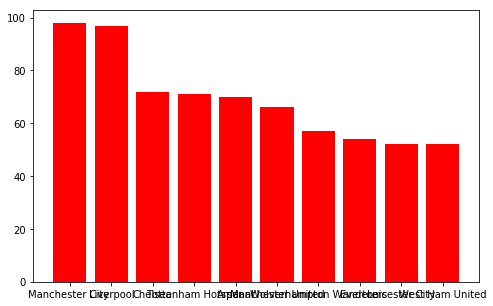

In [30]:
plt.figure(figsize=(8,5))
plt.bar(premier_df["Team"], premier_df["Pts"], color= "red")

# Exercises!